# Assigment 2

## Data Augmentation: Edgar filings
---

The purpose of this assignment is to extract valuable information from text and convert it into variables where the initial input is a list of companies in a dataset, the idea will be to reproduce into certain extent what is revised in the notebooks 2.1, 2.2 as well as taking in consideration the block 1 which objective will be to augment/create knowledge of each company/entry.

The following assignment is divided into 3 parts: Text features creations, Dataset augmentation and Preliminary analysis where is each part will be asked to create functions or routines for data processing.  

The expected output of this notebook is a rich, structured data in table format as well as exporatory analysis:

1. **Core Dataset** - Table formated data ready for analytics
2. **Analysis** - Be creative!! here you have the freedom to perform any data analysis of your preference

EDGAR filings text analysis resources: [Github repo](https://github.com/rohitharitash/EDGAR-reports-Text-Analysis), [OpenEDGAR paper](https://arxiv.org/pdf/1806.04973.pdf) and [Code](https://github.com/LexPredict/openedgar)

---
## Part 1: Text features creation

1. Create a function or procedure that perform the NLP tasks revised in Section 2.2.1. (Stopwords adding, Stemming, Tokenization, etc.) feel free to add additional steps found in different resources

In [1]:
import pandas as pd
import pickle

In [2]:
df = pd.read_csv('datasets/table_companies_short.csv',sep=',', index_col=0)
tickers = list(df['ticker'])
df.head()

,cik,exchange,irs,name,sic,ticker,file
196,1470177,OTC,611585332,Axiologix Education Corp,7372,AXLX,https://www.sec.gov/Archives/edgar/data/147017...
1090,59527,NASDAQ,340359955,Lincoln Electric Holdings Inc,3540,LECO,https://www.sec.gov/Archives/edgar/data/59527/...


In [3]:
# Load pickled files
import lxml.html.clean 
data = {}
for i, t in enumerate(tickers):
    with open("reports/" + t + ".txt", "rb") as file:
        data[t] = lxml.html.clean.clean_html(pickle.load(file))

In [4]:
# Define stopwrods
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
stopwordsfile = "dictionaries/financial_stopwrods.txt"
file = open(stopwordsfile, "r")
financial_stop_words = file.read().split('\n')
stopwords = []
stopwords.extend(english_stop_words)
stopwords.extend(financial_stop_words)
stopwords = list(set(stopwords))

In [5]:
print(data['AXLX'][0:600])

<div>0001654954-19-003723.txt : 20190401
0001654954-19-003723.hdr.sgml : 20190401
20190329181508
ACCESSION NUMBER:		0001654954-19-003723
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		45
CONFORMED PERIOD OF REPORT:	20181231
FILED AS OF DATE:		20190401
DATE AS OF CHANGE:		20190329

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			Advantego Corp
		CENTRAL INDEX KEY:			0000869531
		STANDARD INDUSTRIAL CLASSIFICATION:	SERVICES-COMPUTER PROCESSING &amp; DATA PREPARATION [7374]
		IRS NUMBER:				841116515
		STATE OF INCORPORATION:			CO
		FISCAL YEAR END:			1231

	FILING VALUES:
		FORM TYP


In [6]:
from utils import *
for r in data.keys():
    report = data[r]
    report = clean_text(report)
    report = removeStopWords(report, stopwords)
    data[r] = [report] #pandas format

In [8]:
print(data['AXLX'][0][0:600])

       txt          hdr sgml     accession number      conformed submission type   kpublic document count  conformed period  filed date  date change  filer data conformed name advantego corpcentral index key  standard industrial classification services computer processing  amp  data preparation  irs number  state incorporation cofiscal end  filing values form type   ksec act   actsec file number    film number  address street     east florida ave street   suite  city denverstate cozip  phone        mail address street     east florida ave street   suite  city denverstate cozip  former former c


All the NLP tasks are in sentiment_scores.py

3. Use the function `read_dictionary` revised on 2.2.1 to read the dictionaries:
    - positive_words.txt
    - negative_words.txt
    - uncertainty_dictionary.txt
    - constraining_dictionary.txt
    
Importing the file `sentiment_scores.py` calculate the respective scores. Do not forget that this module uses `nltk`

In [9]:
from sentiment_scores import *

positive_words = read_dictionary('dictionaries/positive_words.txt')
negative_words = read_dictionary('dictionaries/negative_words.txt')
uncertainty_dict = read_dictionary('dictionaries/uncertainty_dictionary.txt')
constraining_dict = read_dictionary('dictionaries/constraining_dictionary.txt')

4. Create a formula or method that calculate the relative scores:  $\frac{absoluteScore}{wordsReport}$

In [10]:
# Relative score function
def relative_score(score, wordcount):
    return round(score / wordcount,4) if wordcount != 0 else 0

5. Test all the functions created on one text/report, example:

```python
positive_score = generate_score(report, positive_words)
negative_score = generate_score(report, negative_words)
count_tokens = total_word_count(report)
polarity = polarity_score(positive_score, negative_score)
uncertainty_score = generate_score(report, uncertainty_dict)
constraining_score = generate_score(report, constraining_dict)
avg_sentence_length = average_sentence_length(report)
perc_complex_word = percentage_complex_word(report)
fog_index = calculate_fog_index(avg_sentence_length, perc_complex_word)
positive_relative = relative_score(positive_score, count_tokens)
negative_relative = relative_score(negative_score, count_tokens)
uncertainty_relative = relative_score(uncertainty_score, count_tokens)
constraining_relative = relative_score(constraining_score, count_tokens)
```

---
## Part 2: Dataset augmentation


6. Apply that function to each report in `EDGAR_corpus.pkl` and update the text for each company   
**IMPORTANT: for at least 5 companies since the process might take time to compute** 

In [11]:
print(data['AXLX'][0][0:600])

       txt          hdr sgml     accession number      conformed submission type   kpublic document count  conformed period  filed date  date change  filer data conformed name advantego corpcentral index key  standard industrial classification services computer processing  amp  data preparation  irs number  state incorporation cofiscal end  filing values form type   ksec act   actsec file number    film number  address street     east florida ave street   suite  city denverstate cozip  phone        mail address street     east florida ave street   suite  city denverstate cozip  former former c


In [14]:
data = pd.DataFrame\
    .from_dict(data)\
    .transpose()\
    .sort_index()\
    .rename(columns = {0:'report'})

In [16]:
import time
start_time = time.time()
#---  seconds ---

data['count_tokens'] = data.report.apply(total_word_count)
data['percentage_complex_word'] = data.report.apply(percentage_complex_word)
data['positive_score'] = data.report.apply(lambda x: generate_score(x, positive_words))
data['negative_score'] = data.report.apply(lambda x: generate_score(x, negative_words))
data['uncertainty_score'] = data.report.apply(lambda x: generate_score(x, uncertainty_dict))
data['constraining_score'] = data.report.apply(lambda x: generate_score(x, constraining_dict))
data['relative_positive'] = [relative_score(x, y)*10 for x, y in zip(data['positive_score'], data['count_tokens'])]
data['relative_negative'] = [relative_score(x, y)*10 for x, y in zip(data['negative_score'], data['count_tokens'])]
data['relative_uncertainty'] = [relative_score(x, y)*10 for x, y in zip(data['uncertainty_score'], data['count_tokens'])]
data['relative_constraining'] = [relative_score(x, y)*10 for x, y in zip(data['constraining_score'], data['count_tokens'])]
data['fog_index'] = [calculate_fog_index(x, y) for x, y in zip(data['average_sentence_length'], data['percentage_complex_word'])]

print("--- %s seconds ---" % (time.time() - start_time))

--- 12.621342897415161 seconds ---


In [17]:
data.head()

,report,count_tokens,average_sentence_length,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,relative_constraining,fog_index
AXLX,txt hdr sgml accession num...,94843,94843,0.117795,55,277,229,40,0.006,0.029,0.024,0.004,37937.247
LECO,google gbar guser font size padding top ...,276,276,0.148551,0,0,0,0,0.000,0.000,0.000,0.000,110.459


In [23]:
companies = list(data.index)

7. Re-use the procedure created in Section 1.4.3 and add the risk-loss features to our core dataset

In [18]:
data_matrix = pd.read_pickle('pickle/EDGAR_matrix.pkl')
data_matrix.head()

,aa,aaa,aaaa,aaaawyi,aaab,aaabc,aaabf,aaabq,aaabs,aaac,...,zzzutreoh,zzzw,zzzwbme,zzzwql,zzzx,zzzxpe,zzzxzl,zzzyv,zzzz,zzzzx
AAIIQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADK,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMRC,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARX,44,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AWIN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Let's isolate just these risk words
data_risk_words = data_matrix[['risk', 'loss']]

8. Create a relative **risk** score as follows: $\frac{wordsRisk+wordsLoss}{wordsReport}$ add the score to the core table

In [ ]:
data_risk_words['risk_loss'] = data_risk_words['risk'] + data_risk_words['loss']

In [21]:
len(data_risk_words.index) ==  len(data.index)

False

In [82]:
data = pd.merge(data, data_risk_words['risk_loss'], how='inner', right_index=True, left_index=True)

In [86]:
data['relative_risk'] = [relative_score(x, y)*100 for x, y in zip(data['risk_loss'], data['count_tokens'])]

9. Save the final table, the columns should look more or less like this:
```python
['company_name', 'count_tokens', 'average_sentence_length',
       'percentage_complex_word', 'positive_score', 'negative_score',
       'uncertainty_score', 'constraining_score', 'relative_positive',
       'relative_negative', 'relative_uncertainty', 'fog_index',
       'relative_constraining', 'risk_loss', 'relative_risk']
```

In [90]:
data.columns

Index(['report', 'company_name', 'count_tokens', 'average_sentence_length',
       'percentage_complex_word', 'positive_score', 'negative_score',
       'uncertainty_score', 'constraining_score', 'relative_positive',
       'relative_negative', 'relative_uncertainty', 'fog_index',
       'relative_constraining', 'risk_loss', 'relative_risk'],
      dtype='object')

In [89]:
data.drop(columns=['report']).to_csv('data.csv')

In [91]:
data.describe()

,count_tokens,average_sentence_length,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,fog_index,relative_constraining,risk_loss,relative_risk
count,8.000000e+01,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000
mean,1.293325e+06,1.293325e+06,0.099494,5810.762500,2969.212500,6099.925000,831.06250,0.046225,0.035450,0.035863,5.173302e+05,0.010675,370.650000,0.039000
std,1.457535e+06,1.457535e+06,0.038554,5548.068687,4550.427324,12273.515243,803.39289,0.028009,0.030588,0.035875,5.830139e+05,0.010237,377.607495,0.037131
min,1.542000e+03,1.542000e+03,0.008385,0.000000,8.000000,2.000000,0.00000,0.000000,0.002000,0.001000,6.168790e+02,0.000000,0.000000,0.000000
25%,1.655762e+05,1.655762e+05,0.075790,313.000000,507.500000,414.250000,189.00000,0.024750,0.017000,0.011000,6.623053e+04,0.005000,96.750000,0.020000
50%,7.805190e+05,7.805190e+05,0.103172,4952.500000,1915.000000,1121.500000,581.00000,0.045500,0.025000,0.020000,3.122076e+05,0.007500,271.000000,0.035000
75%,2.118047e+06,2.118047e+06,0.113531,9618.500000,3826.250000,8044.750000,1299.00000,0.064750,0.041000,0.050250,8.472189e+05,0.011000,560.500000,0.050000
max,6.235294e+06,6.235294e+06,0.263065,19981.000000,37090.000000,70583.000000,3771.00000,0.110000,0.170000,0.155000,2.494118e+06,0.049000,1590.000000,0.230000


---
## Part 3: Preliminary analysis


10. With the dataset clean and ready, conduct an exploratory data analysis, there are no rules neither recipies

In [11]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, company in enumerate(data_risk_words.index):
    x = round(data_risk_words.relative_risk.loc[company],2)
    y = round(data_risk_words.relative_loss.loc[company],2)
    s = round(data_risk_words.distance_average.loc[company],2)
    plt.scatter(x, y, color='#FF3844', alpha=.8, s=s*150)
    plt.text(x+0.1, y+0.1, data_risk_words.index[i][0:-11], fontsize=8)
    
plt.title('Number of Risk-Loss Terms Used in Document per Thousand Words', fontsize=20)
plt.xlabel('Risk mentions', fontsize=15)
plt.ylabel('Loss mentions', fontsize=15)
plt.savefig('risk_loss.png')
plt.show()

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

You can get some inspiration from [here](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)

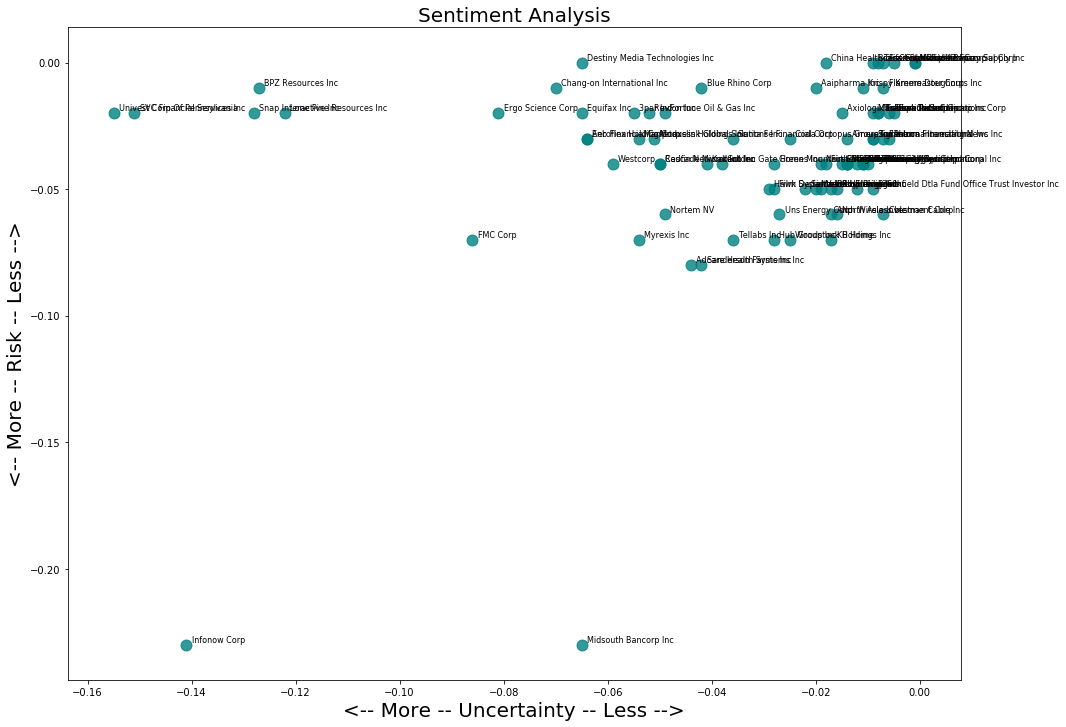

In [94]:
# Let's plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 12]

for index, company in enumerate(data.index):
    x = - data.relative_uncertainty.loc[company]
    y = - data.relative_risk.loc[company]
    plt.scatter(x, y, color='#008080', s=120, alpha=.8)
    plt.text(x+.001, y+.001, data['company_name'][index], fontsize=8)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- More -- Uncertainty -- Less -->', fontsize=20)
plt.ylabel('<-- More -- Risk -- Less -->', fontsize=20)

plt.show()

In [96]:
data.head(2)

,report,company_name,count_tokens,average_sentence_length,percentage_complex_word,positive_score,negative_score,uncertainty_score,constraining_score,relative_positive,relative_negative,relative_uncertainty,fog_index,relative_constraining,risk_loss,relative_risk
AAIIQ,begin privacy enhanced message proc ...,Nortem NV,218399,218399,0.116548,458,2278,1077,658,0.021,0.104,0.049,87359.647,0.03,134,0.06
ADK,sec document txt sec header ...,BPZ Resources Inc,3596084,3596084,0.084405,15859,11807,45740,3771,0.044,0.033,0.127,1438433.634,0.01,506,0.01


In [97]:
data['invest'] = [1 if i < data.relative_uncertainty.median() else 0 for i in data.relative_uncertainty]

In [100]:
# Importing the dataset
X = data.loc[:, ['count_tokens','average_sentence_length', 'percentage_complex_word','constraining_score',
                    'relative_positive','relative_negative','relative_risk','fog_index']].values
y = data.loc[:,'invest'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 467)

from sklearn import preprocessing
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])